## Calculation of Coverage

In [ ]:
dataset_structure_path = '/ds/images/AI4EO/EnhancedS2Agriculture/preprocessed/train'

> By clouds (filtering classes 3,8, and 9)

In [ ]:
from src.coverage_analysis.dataset_coverage_analysis import analyze_dataset
from src.coverage_analysis.SCL import IND_ALL_,IND_CLOUDS_, remove_labels

idx_targets = remove_labels(IND_ALL_, IND_CLOUDS_) #index to be selected (all except 3, 8 and 9)
min_spatial_coverage=70
min_temporal_coverage=70      
output_dir = "./coverage/ai4eo/"
num_process=-1
results = analyze_dataset(dataset_structure_path = dataset_structure_path, 
                            idx_targets = idx_targets, 
                            min_spatial_coverage = min_spatial_coverage, 
                            min_temporal_coverage = min_temporal_coverage,
                            output_dir=output_dir,
                            num_process=num_process
                            )

> By Classes (selecting classes 4, 5)

In [ ]:
from src.coverage_analysis.dataset_coverage_analysis import analyze_dataset
from src.coverage_analysis.SCL import IND_ALL_,IND_CLOUDS_, remove_labels

idx_targets = [4,5]
min_spatial_coverage=70
min_temporal_coverage=70      
output_dir = "./coverage/ai4eo/"
num_process=-1
results = analyze_dataset(dataset_structure_path = dataset_structure_path, 
                            idx_targets = idx_targets, 
                            min_spatial_coverage = min_spatial_coverage, 
                            min_temporal_coverage = min_temporal_coverage,
                            output_dir=output_dir,
                            num_process=num_process
                            )

## Plots

In [1]:
input_dir = './coverage/ai4eo/'

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
from src.visualization.plots import plot_coverage_order

df_stats_veg = pd.read_csv(f"{input_dir}/assesment_spat_70_temp_70_sel_0405.csv", index_col=0)
df_stats_cloud = pd.read_csv(f"{input_dir}/assesment_spat_70_temp_70_sel_000102040506071011.csv", index_col=0)
df_stats_cloud.head()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
eopatch-841,38,36,89.680168,34,89.473684,high,high
eopatch-781,38,38,87.406063,33,86.842105,high,high
eopatch-718,38,38,90.185642,33,86.842105,high,high
eopatch-804,38,38,89.544000,31,81.578947,high,high
eopatch-903,38,37,86.175158,30,78.947368,high,high


In [3]:
#low coverage fields based on spatial assessment
df_stats_cloud[df_stats_cloud["assesment_spatial"] == "low"]

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,


In [4]:
#low coverage fields based on temporal assessment
df_stats_cloud[df_stats_cloud["assesment_temporal"] == "low"]

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
eopatch-908,38,34,80.265895,26,68.421053,low,high


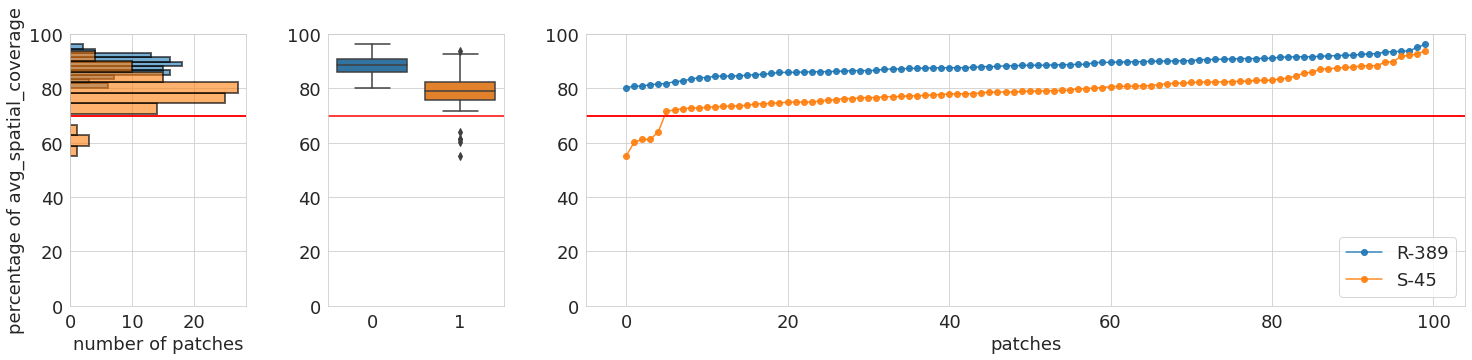

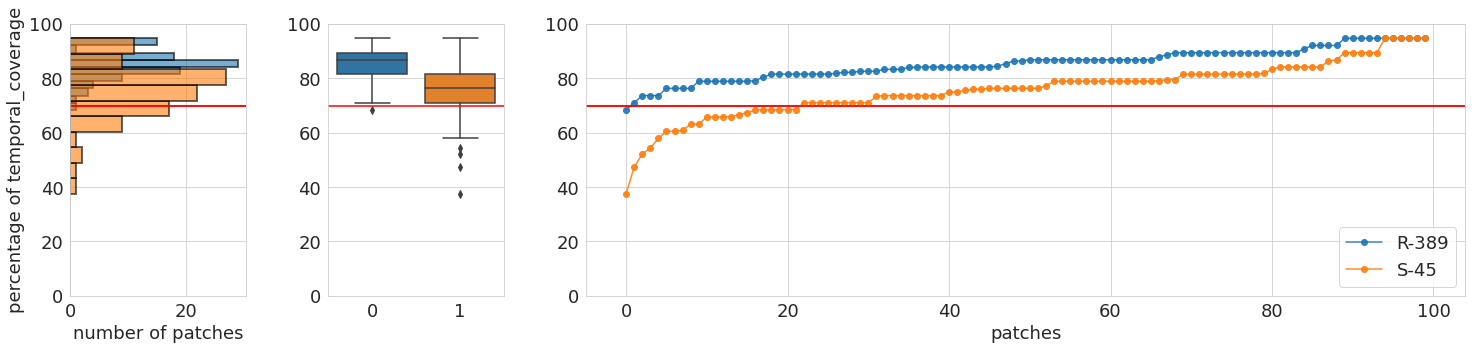

In [5]:
plot_coverage_order([df_stats_cloud,df_stats_veg], ["R-389","S-45"], "avg_spatial_coverage", lower_limit=70, lower_limit_show=True)
plt.savefig("imgs/ai4eo_spatial_coverage_70.pdf")
plt.show()

plot_coverage_order([df_stats_cloud,df_stats_veg], ["R-389","S-45"], "temporal_coverage", lower_limit=70, lower_limit_show=True)
plt.savefig("imgs/ai4eo_temporal_coverage_70.pdf")
plt.show()

### Attach metrics results into Coverage

In [6]:
import pandas as pd
from src.utils.dataframe_based import add_topk_column
from src.visualization.plots import plot_col_categorization

folder_results = "./ml_results/ai4eo/"

df_metrics_p_patch_train = pd.read_csv(f"{folder_results}/train_preds_patchs.csv", index_col=0)
df_metrics_p_patch_test = pd.read_csv(f"{folder_results}/test_preds_patchs.csv", index_col=0)
df_metrics_p_patch_test.head()

,MCC,ACC
eopatch-298,0.825550,0.964864
eopatch-342,0.826631,0.962379
eopatch-343,0.825348,0.951240
eopatch-381,0.666570,0.917755
eopatch-404,0.737810,0.950077


MCC                                                    \
                   count      mean       std       min       25%       50%   
assesment_temporal                                                           
high                19.0  0.785465  0.055856  0.666570  0.741563  0.799981   
low                  1.0  0.711042       NaN  0.711042  0.711042  0.711042   

                                         ACC                                \
                         75%       max count      mean       std       min   
assesment_temporal                                                           
high                0.826092  0.858167  19.0  0.929426  0.041174  0.854398   
low                 0.711042  0.711042   1.0  0.926882       NaN  0.926882   

                                                            
                         25%       50%       75%       max  
assesment_temporal                                          
high                0.892358  0.949551  0.963564  0.978436  
low                 0.926882  0.926882  0.926882  0.926882

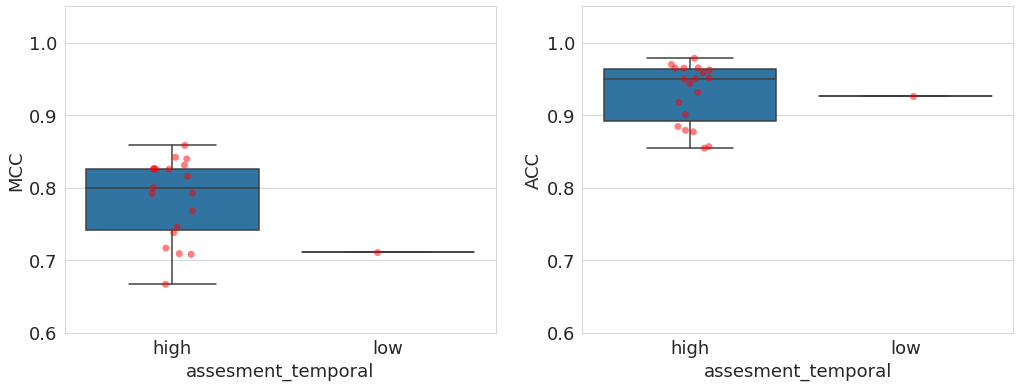

In [12]:
df_stats_test = df_stats_cloud.loc[df_metrics_p_patch_test.index]

df_attached = plot_col_categorization(df_stats_test, df_metrics_p_patch_test, col="assesment_temporal")
plt.savefig("imgs/ai4eo_temporal_assessment_70_clouds.pdf")
plt.show()

> Correlation

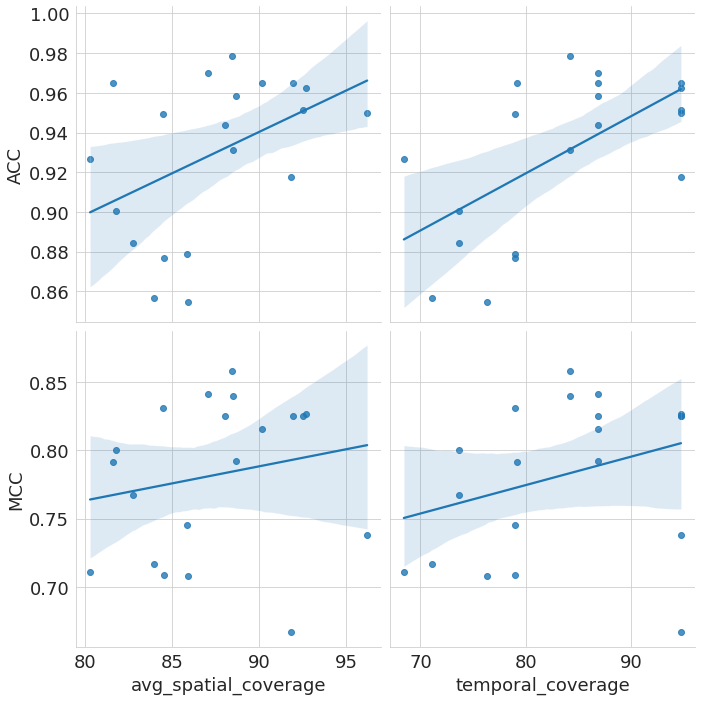

In [13]:
import seaborn as sns
a= sns.pairplot(data=df_attached, x_vars=["avg_spatial_coverage","temporal_coverage"], y_vars=["ACC","MCC"], kind="reg", diag_kind="hist", height=5, markers=['o'])
plt.savefig("imgs/ai4eo_regplot_70_clouds.pdf")
plt.show()

In [9]:
df_attached.corr()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,MCC,ACC
num_timesteps,1.000000,0.983386,-0.806330,0.946244,-0.763775,0.062733,-0.224663
num_timesteps_missing,0.983386,1.000000,-0.777911,0.939147,-0.730053,0.040399,-0.254405
avg_spatial_coverage,-0.806330,-0.777911,1.000000,-0.598844,0.931548,0.190635,0.449968
num_timesteps_abovecov,0.946244,0.939147,-0.598844,1.000000,-0.516395,0.245221,-0.000311
temporal_coverage,-0.763775,-0.730053,0.931548,-0.516395,1.000000,0.313305,0.613180
MCC,0.062733,0.040399,0.190635,0.245221,0.313305,1.000000,0.703390
ACC,-0.224663,-0.254405,0.449968,-0.000311,0.613180,0.703390,1.000000


### Consideron top-K images

Limit temporal_coverage is 78.94736842105263


MCC                                                    \
               count      mean       std       min       25%       50%   
assesment_top5                                                           
high            12.0  0.803903  0.053266  0.666570  0.792251  0.825449   
low              8.0  0.748506  0.047024  0.707902  0.710491  0.730878   

                                     ACC                                \
                     75%       max count      mean       std       min   
assesment_top5                                                           
high            0.829880  0.858167  12.0  0.954831  0.017163  0.917755   
low             0.775656  0.830981   8.0  0.890999  0.033216  0.854398   

                                                        
                     25%       50%       75%       max  
assesment_top5                                          
high            0.948487  0.960420  0.964914  0.978436  
low             0.871820  0.881597  0.907112  0.949551

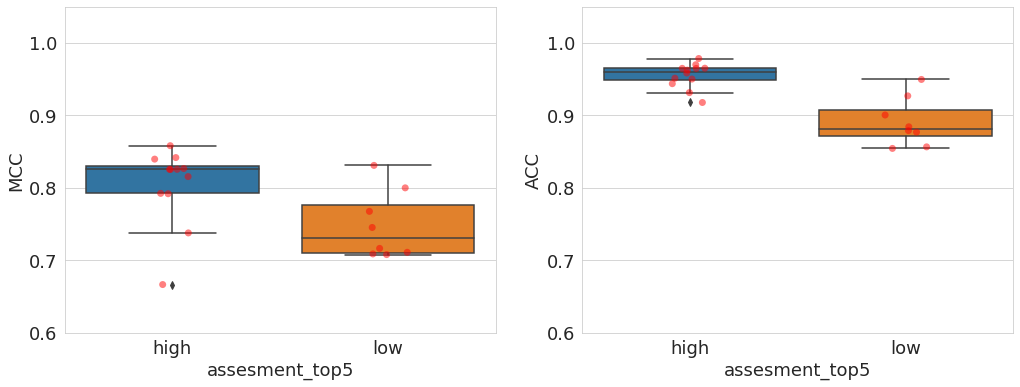

In [14]:
df_stats_test = df_stats_cloud.loc[df_metrics_p_patch_test.index]
add_topk_column(df_stats_test, k=5, column="temporal_coverage")

data_attached = plot_col_categorization(df_stats_test, df_metrics_p_patch_test, col="assesment_top5")
plt.savefig("imgs/ai4eo_temporal_assessment_top5_clouds.pdf")
plt.show()

In [11]:
data_attached

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial,assesment_top5,MCC,ACC
eopatch-298,19,19,91.961432,18,94.736842,high,high,high,0.825550,0.964864
eopatch-342,19,18,92.704421,18,94.736842,high,high,high,0.826631,0.962379
eopatch-343,19,19,92.496674,18,94.736842,high,high,high,0.825348,0.951240
eopatch-381,19,19,91.815916,18,94.736842,high,high,high,0.666570,0.917755
eopatch-404,19,19,96.207579,18,94.736842,high,high,high,0.737810,0.950077
eopatch-577,48,48,81.572300,38,79.166667,high,high,high,0.791887,0.964748
eopatch-644,38,36,88.045305,33,86.842105,high,high,high,0.825554,0.943717
eopatch-672,38,38,87.066821,33,86.842105,high,high,high,0.841769,0.969855
eopatch-718,38,38,90.185642,33,86.842105,high,high,high,0.815547,0.965065
eopatch-740,38,38,84.448379,30,78.947368,high,high,low,0.830981,0.949551


what happened with eopatch-880	??